In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

In [5]:
dataset = pd.read_csv(r"D:\Internship projects\student performance factor\StudentPerformanceFactorsdataset.csv")


In [6]:
print(dataset.head(10))
# print(dataset.tail(10))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No          

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
print(dataset.shape)

(6607, 20)


In [9]:
dataset.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
dataset.drop(columns= ["Extracurricular_Activities",
"Internet_Access",
"Family_Income",
"School_Type",
"Peer_Influence",
"Physical_Activity",
"Learning_Disabilities",
"Parental_Education_Level",
"Distance_from_Home",
"Gender"
], inplace=True)

In [11]:
dataset.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,101.000000


In [12]:
dataset.isnull().sum()

Hours_Studied            0
Attendance               0
Parental_Involvement     0
Access_to_Resources      0
Sleep_Hours              0
Previous_Scores          0
Motivation_Level         0
Tutoring_Sessions        0
Teacher_Quality         78
Exam_Score               0
dtype: int64

In [13]:
dataset['Teacher_Quality'].fillna(dataset['Teacher_Quality'].mode(), inplace = True)

C:\Users\Ali's PC\AppData\Local\Temp\ipykernel_4588\2207455408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Teacher_Quality'].fillna(dataset['Teacher_Quality'].mode(), inplace = True)


In [14]:
dataset.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Exam_Score
0,23,84,Low,High,7,73,Low,0,Medium,67
1,19,64,Low,Medium,8,59,Low,2,Medium,61
2,24,98,Medium,Medium,7,91,Medium,2,Medium,74
3,29,89,Low,Medium,8,98,Medium,1,Medium,71
4,19,92,Medium,Medium,6,65,Medium,3,High,70
5,19,88,Medium,Medium,8,89,Medium,3,Medium,71
6,29,84,Medium,Low,7,68,Low,1,Medium,67
7,25,78,Low,High,6,50,Medium,1,High,66
8,17,94,Medium,High,6,80,High,0,Low,69
9,23,98,Medium,Medium,8,71,Medium,0,High,72


Histogram ko Target

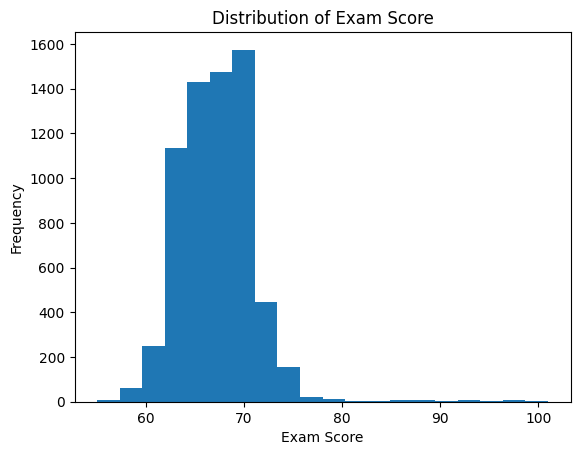

In [15]:
#Target Column

plt.figure()
plt.hist(dataset['Exam_Score'], bins=20)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Score')
plt.show()

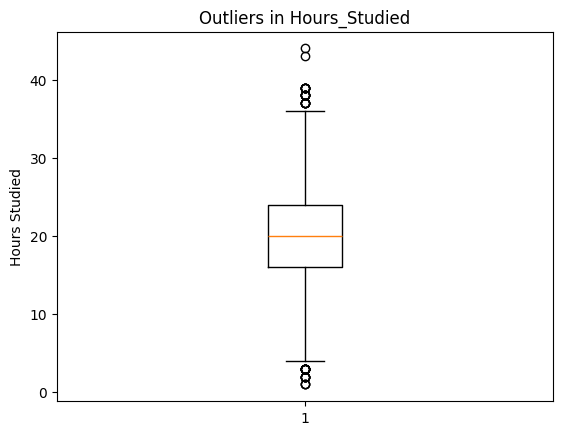

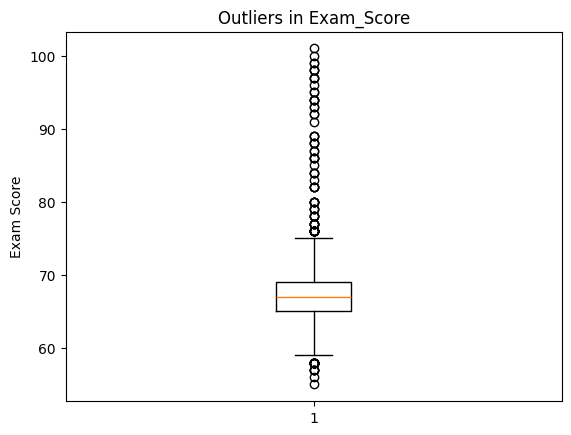

In [16]:
plt.figure()
plt.boxplot(dataset["Hours_Studied"])
plt.ylabel("Hours Studied")
plt.title("Outliers in Hours_Studied")
plt.show()

plt.figure()
plt.boxplot(dataset["Exam_Score"])
plt.ylabel("Exam Score")
plt.title("Outliers in Exam_Score")
plt.show()


In [17]:
print(dataset.head(10))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

   Sleep_Hours  Previous_Scores Motivation_Level  Tutoring_Sessions  \
0            7               73              Low                  0   
1            8               59              Low      

In [18]:
le = LabelEncoder()
dataset["Parental_Involvement"] = le.fit_transform(dataset["Parental_Involvement"] )
dataset["Access_to_Resources"] = le.fit_transform(dataset['Access_to_Resources'])
dataset["Motivation_Level"] = le.fit_transform(dataset["Motivation_Level"])
dataset["Teacher_Quality"] = le.fit_transform(dataset['Teacher_Quality'])

In [19]:
print(dataset.head(10))

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   
5             19          88                     2                    2   
6             29          84                     2                    1   
7             25          78                     1                    0   
8             17          94                     2                    0   
9             23          98                     2                    2   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0            7               73                 1                  0   
1            8               5

Data spliting

In [20]:
X = dataset.drop(columns=['Exam_Score'])
y = dataset['Exam_Score']

In [21]:
print(X.shape, y.shape)

(6607, 9) (6607,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
print(X_train.shape, X_test.shape)

(5285, 9) (1322, 9)


In [24]:
num_col = ["Hours_Studied","Attendance","Sleep_Hours","Previous_Scores","Tutoring_Sessions"]

scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [25]:
print(X_train, X_test)

      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
622        1.830276   -1.468972                     2                    0   
2555       0.498341    0.606904                     2                    0   
5679      -0.500610   -1.036498                     1                    0   
5113      -1.333069   -1.555467                     2                    0   
1494       1.497293   -1.555467                     0                    2   
...             ...         ...                   ...                  ...   
2514      -0.167626    0.347420                     2                    0   
6443       0.831325   -0.258044                     2                    0   
3606      -0.833593    1.298863                     0                    1   
5704      -0.334118    0.693399                     2                    2   
2575      -1.166577   -1.122993                     1                    2   

      Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_

In [26]:
# model = LinearRegression()

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [27]:
y_pred = model.predict(X_test)

In [28]:
MAE = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {MAE:.2f}")

MSE = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {MSE:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"r2 Score: {r2:.4f}")

Mean Absolute Error: 1.03
Mean Squared Error: 6.65
r2 Score: 0.6133


In [29]:
import joblib
joblib.dump(model, 'student_marks_predictor.pkl')
joblib.dump(scaler, 'data_scaler.pkl')

['data_scaler.pkl']